# Data Scientist: work test (brief)
Please work your way through the challenge below. This is not designed to trip you up and you may refer to any resources necessary.
* Resources: your own know-how plus feel free to use any resource you can find online, this is not a memory test.
* Not allowed: sharing...or help from a friend, colleague, relative or basically anyone else!
* Time allowed: 60 minutes. Your time is precious.
* Assessment: inspection of method used, expected results obtained. 
* Completed? Please export as a Python module and return to the recruiter.
<HR>

## Challenge
Build a simple model using the nominated dataset and Sklearn (or other Python library) to predict __"Level"__ based on any available and appropriate features.
#### Inputs
Use this dataset: http://resources.xperthr.co.uk/surveys/salary/Sample/Work_Test_-_synthetic_data_ds.xlsx
#### Outputs
* Working code that fits a model 
* Prediction accuracy score metric named "c1_score" for a 30% test sample


## SOLUTION

In [2]:
import pandas as pd
import urllib2
import seaborn as sns

Let's load the data and explore it first

In [3]:
link = 'http://resources.xperthr.co.uk/surveys/salary/Sample/Work_Test_-_synthetic_data_ds.xlsx'
socket = urllib2.urlopen(link)
xd = pd.ExcelFile(socket)
xd.sheet_names

[u'DATA', u'DICTIONARY', u'NOTES']

In [4]:
df = xd.parse(xd.sheet_names[0], header=0)
df.head()

,Basic_Salary,Bonus,Group,Level,Gender
0,48686.278732,9420.756377,Call centre,(2) Supervisors / Experienced staff,Male
1,10191.013721,206.510473,Finance,(1) Junior staff,Female
2,30816.941629,980.769420,Product C,(1) Junior staff,Female
3,30831.968804,1566.557269,Sales,(2) Supervisors / Experienced staff,Female
4,44125.142656,5125.263738,Logistics,(1) Junior staff,Male


In [5]:
dictionary = xd.parse(xd.sheet_names[1], header=0)
dictionary

,Field,Description
0,Basic_Salary,Current annual salary of employee (£)
1,Bonus,Amount of bonus received in past 12 months by ...
2,Group,Business group of employee
3,Level,Job level of employee
4,Gender,Gender of employee


In [6]:
notes = xd.parse(xd.sheet_names[2], header=0)
notes.iloc[0,1], notes.iloc[1,1]

(u'This is an entirely fictional dataset.',
 u'The dataset provides information on the all of the employees of a notional UK private sector organisation.')

The dataset contains data from a fictional UK private organisation. It comprises data on basic salary, bonus, team they work on, level and gender

## Data Format and descriptives

Let's have a look to some descriptives


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
Basic_Salary    1989 non-null float64
Bonus           1989 non-null float64
Group           1993 non-null object
Level           2000 non-null object
Gender          2000 non-null object
dtypes: float64(2), object(3)
memory usage: 78.2+ KB


In [8]:
df[df['Basic_Salary'].isna()]

,Basic_Salary,Bonus,Group,Level,Gender
16,NaN,954.453017,Call centre,(1) Junior staff,Female
306,NaN,3015.727366,Finance,(3) Team Managers,Male
376,NaN,642.743906,IT,(1) Junior staff,Female
654,NaN,1321.563720,Business services,(2) Supervisors / Experienced staff,Male
724,NaN,26663.253416,Sales,(4) Senior Managers,Male
1003,NaN,293.370251,Finance,(2) Supervisors / Experienced staff,Female
1073,NaN,281.729133,Call centre,(1) Junior staff,Female
1355,NaN,2077.044082,Call centre,(2) Supervisors / Experienced staff,Female
1425,NaN,1270.383646,IT,(1) Junior staff,Female
1778,NaN,6498.130199,Business services,(3) Team Managers,Male


In [9]:
df[df['Bonus'].isna()]

,Basic_Salary,Bonus,Group,Level,Gender
91,90565.047729,NaN,Call centre,(4) Senior Managers,Male
230,38036.682126,NaN,Business services,(2) Supervisors / Experienced staff,Male
448,20486.711642,NaN,HR,(1) Junior staff,Female
585,63156.212320,NaN,Business services,(5) Department Head,Male
794,48221.952121,NaN,Product B,(2) Supervisors / Experienced staff,Female
933,18225.840801,NaN,Call centre,(1) Junior staff,Female
1143,39068.967639,NaN,Finance,(3) Team Managers,Male
1285,28044.759051,NaN,Product C,(1) Junior staff,Female
1496,44715.397841,NaN,Business services,(3) Team Managers,Male
1708,25344.540590,NaN,Finance,(1) Junior staff,Female


There are 11 null values in basic salary and bonus, 7 null values in group

In [10]:
df.describe()

,Basic_Salary,Bonus
count,1989.000000,1989.000000
mean,42696.019052,4363.660330
std,24235.120788,8415.728767
min,7083.089562,21.911641
25%,26116.805345,786.398788
50%,37094.586792,1839.031102
75%,53026.771998,4718.152020
max,215104.460674,128633.839876


Let's analyse this variables in histogram

In [11]:
df.describe(include='object')

,Group,Level,Gender
count,1993,2000,2000
unique,13,9,2
top,IT,(2) Supervisors / Experienced staff,Female
freq,418,639,1176


Conclusions:
* 9 levels, 13 groups
* aprox mean salary: 43k; aprox median salary: 37k
* aprox mean bonus: 4k; aprox median bonus: 1.8k

## Trasnformations

list of transformations:
* Deal with NA's
* Salary and bonus to integer
* categorical to categorical?

I'll use pandas for these transformations

### NA's
I think the best option is to get rid of the records with na's

In [12]:
df.dropna(axis=0, how='any', subset=['Basic_Salary', 'Bonus'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1999
Data columns (total 5 columns):
Basic_Salary    1978 non-null float64
Bonus           1978 non-null float64
Group           1971 non-null object
Level           1978 non-null object
Gender          1978 non-null object
dtypes: float64(2), object(3)
memory usage: 92.7+ KB


That's 22 rows deleted. There is still 7 na's in the group variable. I will see get rid of those it's needed as well

In [13]:
df = df.astype({"Basic_Salary": int, "Bonus": int})

## EXPLORATORY DATA ANALYSIS

Let's have a look to the distributions of Salaries and Bonus

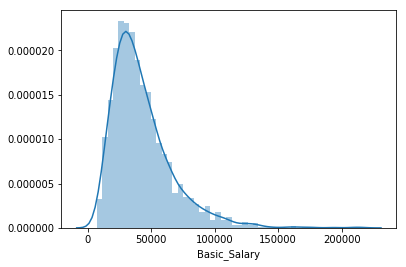

In [18]:
sns.distplot(df['Basic_Salary'])

Not normal. Fat right tail (mean larger than median)

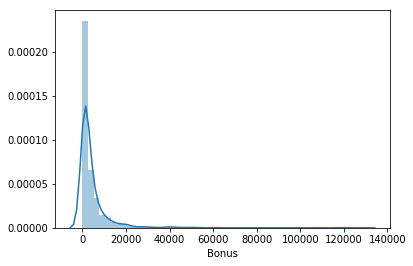

In [19]:
sns.distplot(df['Bonus'])

Not normal, Long right tail. Lot's of 0 bonuses?

In [20]:
sum(df['Bonus'] == 0)

0

No 0's so most of the bonuses are very low

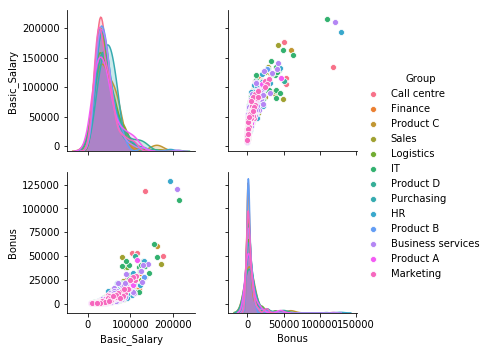

In [15]:
sns.pairplot(df, hue='Group')

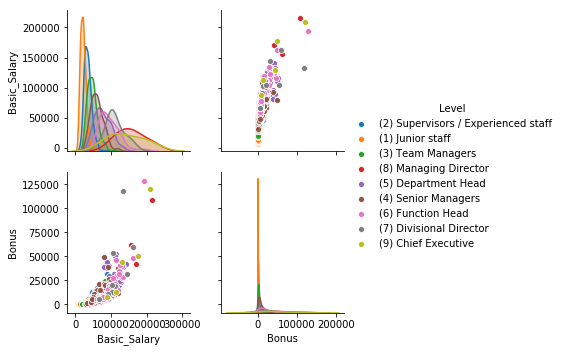

In [16]:
sns.pairplot(df, hue='Level')

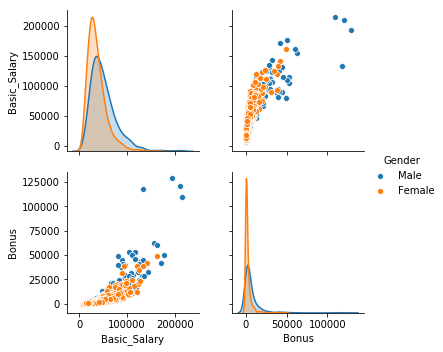

In [17]:
sns.pairplot(df, hue='Gender')

## MODELLING
We need to fit a classification model. Gender should not be a predictor of level, so I will leave out of the the model.

For the modeling I get rid of all the na's including group

In [14]:
df.dropna(axis=0, how='any', subset=['Group'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1999
Data columns (total 5 columns):
Basic_Salary    1971 non-null int64
Bonus           1971 non-null int64
Group           1971 non-null object
Level           1971 non-null object
Gender          1971 non-null object
dtypes: int64(2), object(3)
memory usage: 92.4+ KB


In [18]:
X = df[['Basic_Salary', 'Bonus', 'Group']]
y = df['Level']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1999
Data columns (total 3 columns):
Basic_Salary    1971 non-null int64
Bonus           1971 non-null int64
Group           1971 non-null object
dtypes: int64(2), object(1)
memory usage: 141.6+ KB


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_preprocessor = ColumnTransformer(
    transformers= [('cat', ohe, ['Group'])], remainder='passthrough'
)

In [66]:
X_t = X_preprocessor.fit_transform(X)

In [95]:
le = LabelEncoder()
y_t = le.fit_transform(y)
y_names = list(le.classes_)

In [72]:
X_train, X_test, y_train, y_test = \
        train_test_split(X_t, y_t, test_size=.3, random_state=123, stratify=y)

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial')
lr_m = lr.fit(X_test, y_test)

0.4239864864864865

In [143]:
lr_preds = lr_m.predict(X_test)
f1_score(y_test, lr_preds, average='weighted')

0.3907831338878222

## SVC

In [87]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc_m = svc.fit(X_train, y_train) 

In [88]:
svc_preds = svc_m.predict(X_test)

In [141]:
f1_score(y_test, svc_preds, average='weighted')

0.15595838805557474

## Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_m = gnb.fit(X_train, y_train)

In [140]:
gnb_preds = gnb.predict(X_test)
# accuracy_score(y_test, gnb_preds)
f1_score(y_test, gnb_preds, average='micro')

0.4797297297297297

In [97]:
print(classification_report(y_test, gnb_preds, target_names=y_names))

                                     precision    recall  f1-score   support

                   (1) Junior staff       0.54      0.91      0.68       148
(2) Supervisors / Experienced staff       0.49      0.44      0.46       190
                  (3) Team Managers       0.39      0.31      0.35       127
                (4) Senior Managers       0.39      0.24      0.30        71
                (5) Department Head       0.43      0.26      0.33        38
                  (6) Function Head       0.00      0.00      0.00        13
            (7) Divisional Director       0.00      0.00      0.00         3
              (8) Managing Director       0.00      0.00      0.00         1
                (9) Chief Executive       0.00      0.00      0.00         1

                          micro avg       0.48      0.48      0.48       592
                          macro avg       0.25      0.24      0.23       592
                       weighted avg       0.45      0.48      0.45       5

In [144]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel = kernel, random_state=123)

gpc_m = gpc.fit(X_train, y_train)
gpc_preds = gpc.predict(X_test)
f1_score(y_test, lr_preds, average='weighted')

0.3907831338878222